# Basic Iterative Method

Functions used:

`attack_BIM`

`single_attack_stats_BIM`

`visualize_attack_BIM`

`all_samples_attack_BIM`

`confidence_range_attack_BIM`

`analyze_attack_BIM`

`compute_hyperparameter_plot`


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torchvision import models
from torchvision import transforms

plt.rcParams['figure.figsize'] = (20.0, 10.0)
from IPython.display import clear_output

# Import helper functions
from modules.helper import *
from modules.dataset import ImageNetSubset

from modules.bim import *

## 0. Load Model and Data

We load the pre-trained googleNet and the data.

In [2]:
## Load model and data
model = models.googlenet(pretrained=True)
model.eval();

In [3]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]   

preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])

data_loader = torch.utils.data.DataLoader(
    ImageNetSubset("data/ImageNet_subset//dev_dataset.csv", "data/ImageNet_subset//images/", transform=preprocess))

## 1. Introduction

Values for the hyper parameters given in [1]:

- $\alpha = \frac{1}{255}$

- Number of iterations: $min(4+\epsilon, 1.25 \cdot \epsilon)$

- $\epsilon $

Number of iterations: 20
			Clean image	 Adversarial image

Actual class: 		barrel, cask			barrel, cask
Predicted class: 	barrel, cask			whistle
Confidence: 		99.99%				71.91%



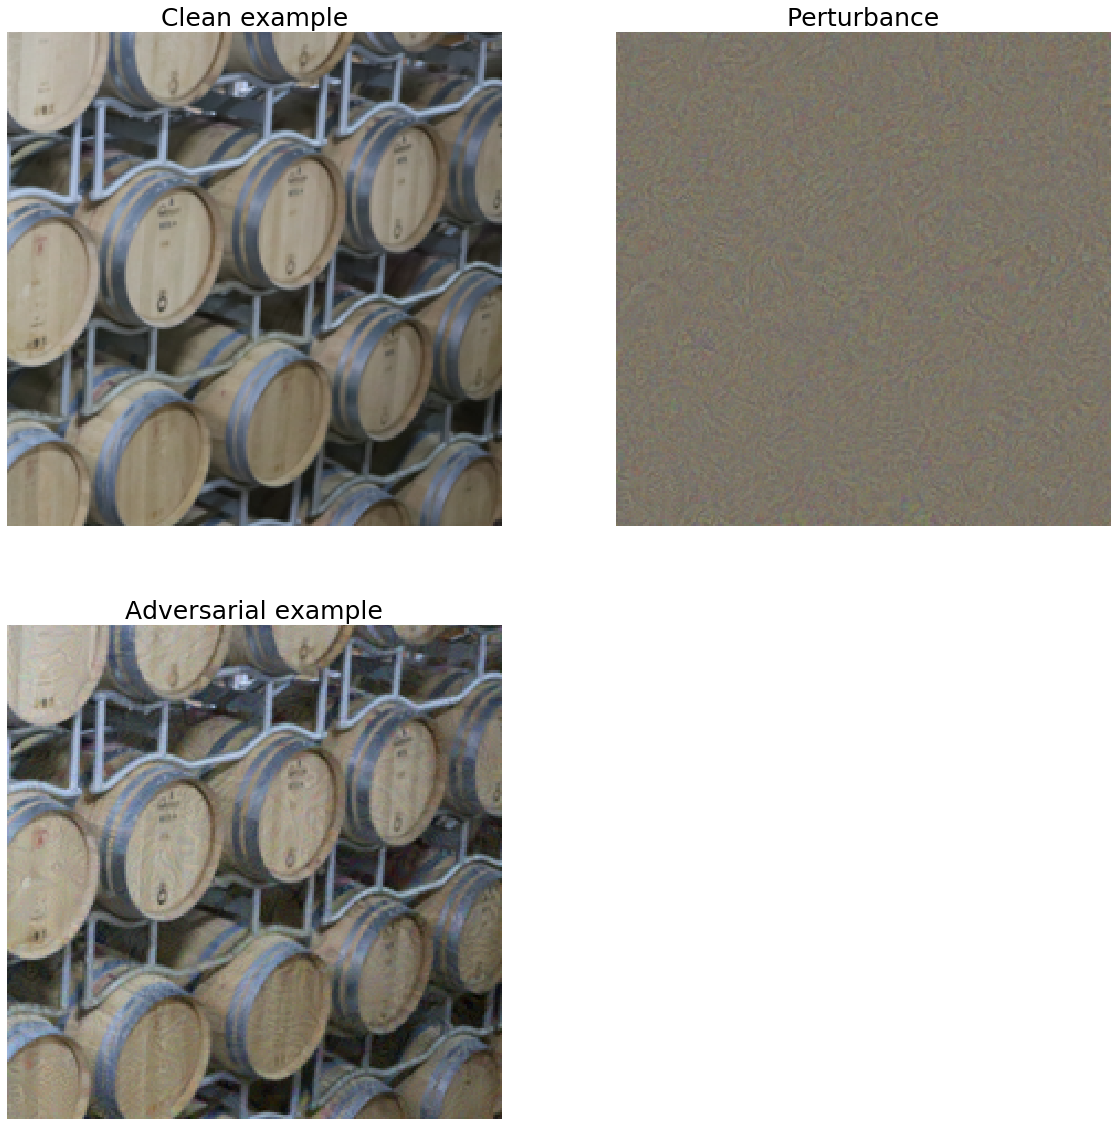

In [4]:
alpha = 1/255
epsilon = 16/255
sample = 766

visualize_attack_BIM(data_loader, mean, std, model, predict, epsilon, alpha, sample, summarize_attack,folder=None)

## 2. All Images

We are splitting the data according to the original confidences. For each of the intervals we craft adversarial examples at varying epsilon and report the confidence and accuracy of these attacks for the interval.


### 2.1 Confidence ranges

In [ ]:
max_confidence = 0.60
min_confidence = 0.40


# Hyperparameter for attacks
epsilons = [0, 0.5/255, 1/255, 2/255, 4/255, 10/255, 20/255, 30/255, 40/255, 50/255, 60/255]    
alpha = 1/255


result = confidence_range_attack_BIM(data_loader, mean, std, model, predict, epsilons, alpha, min_confidence, max_confidence)

In [4]:
max_confidence = 0.90
min_confidence = 0.85


# Hyperparameter for attacks
epsilons = [0, 0.5/255, 1/255, 2/255, 4/255, 10/255, 20/255, 30/255, 40/255, 50/255, 60/255] 
alpha = 1/255

result = confidence_range_attack_BIM(data_loader, mean, std, model, predict, epsilons, alpha, min_confidence, max_confidence)

Running for epsilon 60.00
Sample: 69 of 69
Accuracy top 1 adversarial: 0.00
Accuracy top 5 adversarial: 0.00
Confidence adversarial: 0.72
Number of iterations: 64


In [ ]:
max_confidence = 0.95
min_confidence = 0.90


# Hyperparameter for attacks
epsilons = [0, 0.5/255, 1/255, 2/255, 4/255, 10/255, 20/255, 30/255, 40/255, 50/255, 60/255]    
alpha = 1/255

result = confidence_range_attack_BIM(data_loader, mean, std, model, predict, epsilons, alpha, min_confidence, max_confidence)

In [ ]:
max_confidence = 0.99
min_confidence = 0.95


# Hyperparameter for attacks
epsilons = [0, 0.5/255, 1/255, 2/255, 4/255, 10/255, 20/255, 30/255, 40/255, 50/255, 60/255]    
alpha = 1/255

result = confidence_range_attack_BIM(data_loader, mean, std, model, predict, epsilons, alpha, min_confidence, max_confidence)

In [ ]:
max_confidence = 1.00
min_confidence = 0.99


# Hyperparameter for attacks
epsilons = [0, 0.5/255, 1/255, 2/255, 4/255, 10/255, 20/255, 30/255, 40/255, 50/255, 60/255]    
alpha = 1/255

result = confidence_range_attack_BIM(data_loader, mean, std, model, predict, epsilons, alpha, min_confidence, max_confidence)

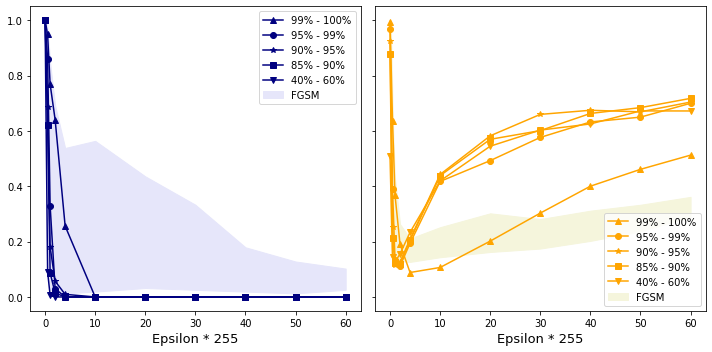

In [12]:
# Load data FGSM
result_99_fgsm = pd.read_csv("results/FGSM/FGSM-Conf99.csv")
result_40_fgsm = pd.read_csv("results/FGSM/FGSM-Conf40.csv")

# Load data BIM
result_99 = pd.read_csv("results/BIM/BIM-Conf99.csv")
result_95 = pd.read_csv("results/BIM/BIM-Conf95.csv")
result_90 = pd.read_csv("results/BIM/BIM-Conf90.csv")
result_85 = pd.read_csv("results/BIM/BIM-Conf85.csv") 
result_40 = pd.read_csv("results/BIM/BIM-Conf40.csv")


# Plot
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10,5))

## Top left: Accuracies
axs[0].plot(result_99["Epsilon_255"], result_99["Accuracy Top 1"], "-^", color='navy', label='99% - 100%')
axs[0].plot(result_95["Epsilon_255"], result_95["Accuracy Top 1"], "-o", color='navy', label='95% - 99%')
axs[0].plot(result_90["Epsilon_255"], result_90["Accuracy Top 1"], "-*", color='navy', label='90% - 95%')
axs[0].plot(result_85["Epsilon_255"], result_85["Accuracy Top 1"], "-s", color='navy', label='85% - 90%')
axs[0].plot(result_40["Epsilon_255"], result_40["Accuracy Top 1"], "-v", color='navy', label='40% - 60%')
axs[0].fill_between(result_99_fgsm["Epsilon_255"], result_40_fgsm["Accuracy Top 1"], result_99_fgsm["Accuracy Top 1"],
                   color="lavender", label="FGSM")
axs[0].legend()
axs[0].set_xlabel("Epsilon * 255", fontsize=13)

## Bottom left: Confidences
axs[1].plot(result_99["Epsilon_255"], result_99["Confidence"], "-^", color='orange', label='99% - 100%')
axs[1].plot(result_95["Epsilon_255"], result_95["Confidence"], "-o", color='orange', label='95% - 99%')
axs[1].plot(result_90["Epsilon_255"], result_90["Confidence"], "-*", color='orange', label='90% - 95%')
axs[1].plot(result_85["Epsilon_255"], result_85["Confidence"], "-s", color='orange', label='85% - 90%')
axs[1].plot(result_40["Epsilon_255"], result_40["Confidence"], "-v", color='orange', label='40% - 60%')
axs[1].fill_between(result_99_fgsm["Epsilon_255"], result_40_fgsm["Confidence"], result_99_fgsm["Confidence"],
                   color="beige", label="FGSM")
axs[1].legend()
axs[1].set_xlabel("Epsilon * 255", fontsize=13)

## Save plot
fig.tight_layout()
fig.savefig("plots/BIM/BIM-Accuracies_Confidences.png")

### 2.2 Including false initial predictions

We compute attacks with all examples. Since the computational cost is high compared to FGSM we split it up into different intervals of epsilon.

In [ ]:
epsilons = [0, 1/255, 2/255, 4/255, 8/255, 16/255, 32/255, 48/255, 64/255, 96/255, 128/255]

alpha = 1/255 # recommended in paper
filename_ext = "0-128"
temp_file = "1"

top1, top5, conf = all_samples_attack_BIM(data_loader, mean, std, model, predict, epsilons, alpha, filename_ext, temp_filename)

In [7]:
# Load data
bim_all = pd.read_csv("results/BIM/BIM-all_samples.csv", index_col=0)
bim_all

,Epsilon,Top1,Top5,Confidence
0,0.0,0.844,0.971,0.623875
1,1.0,0.094,0.227,0.140074
2,2.0,0.015,0.032,0.144705
3,4.0,0.001,0.003,0.225268
4,8.0,0.000,0.000,0.371740
5,16.0,0.000,0.000,0.534874
6,32.0,0.000,0.000,0.639859
7,48.0,0.000,0.000,0.696497
8,64.0,0.000,0.000,0.720600
9,96.0,0.000,0.000,0.759433


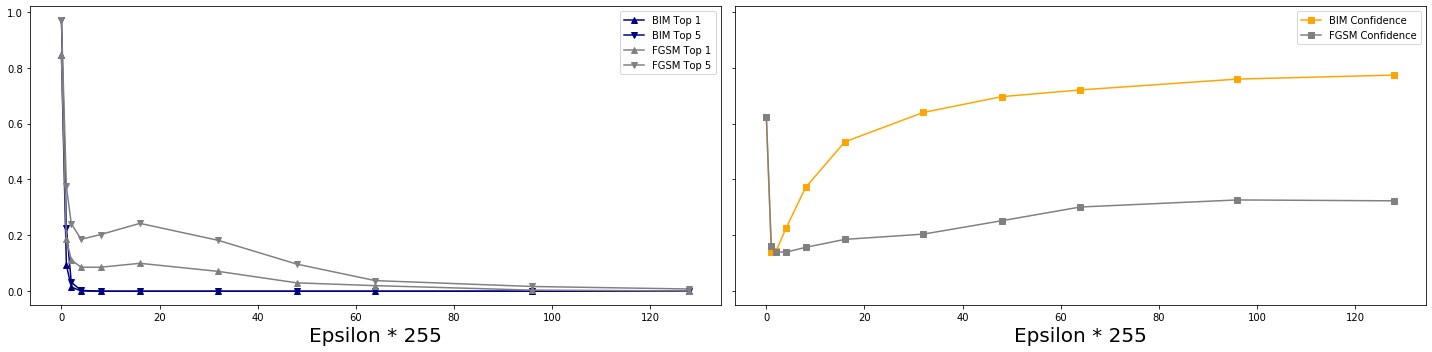

In [29]:
fgsm_all = pd.read_csv("results/FGSM/FGSM-all_samples.csv", index_col=0)
bim_all = pd.read_csv("results/BIM/BIM-all_samples.csv", index_col=0)

# Plot
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10,5))

## Left: Accuracies
axs[0].plot(bim_all["Epsilon"], bim_all["Top1"], "-^", color='navy', label='BIM Top 1')
axs[0].plot(bim_all["Epsilon"], bim_all["Top5"], "-v", color='navy', label='BIM Top 5')
axs[0].plot(fgsm_all["Epsilon"], fgsm_all["Top1"], "-^", color='grey', label='FGSM Top 1')
axs[0].plot(fgsm_all["Epsilon"], fgsm_all["Top5"], "-v", color='grey', label='FGSM Top 5')

axs[0].legend()
axs[0].set_xlabel("Epsilon * 255", fontsize=13)

## Right: Confidences
axs[1].plot(bim_all["Epsilon"], bim_all["Confidence"], "-s", color='orange', label='BIM Confidence')
axs[1].plot(fgsm_all["Epsilon"], fgsm_all["Confidence"], "-s", color='grey', label='FGSM Confidence')


axs[1].legend()
axs[1].set_xlabel("Epsilon * 255", fontsize=13)

## Save plot
fig.tight_layout()
fig.savefig("plots/BIM/BIM-compare_attacks_FGSM.png")

## 3. Indivdual Images

### 3.1 Confidence and correct/false class over epsilon for individual images

We calculate the adversarial confidences for each case where the initial prediction is successful for different epsilons. This allows us to find examples with e.g. high adversarial confidence for further investigations.

In [ ]:
## Running COLAB ->

# All images: Only for correct initial classifiation we compute adversaries.
epsilons = [0, 1/255, 2/255, 4/255, 8/255, 16/255, 32/255]
alpha = 1/255


result = pd.DataFrame()


# Find examples with correct initial prediction
samples = []

for sample in range(1000):
    image_clean, class_index = data_loader.dataset[sample]
    image_clean.unsqueeze_(0)
    class_index.unsqueeze_(0)
    
    predicted_classes, _, _ = predict(model, image_clean, class_index, return_grad=False)
        
    if predicted_classes[0] == class_index.squeeze().numpy():
        samples.append(sample)
        clear_output(wait=True)
        print("Identified correct clean predictions: {}".format(len(samples)))

        
result["Sample"] = samples


for epsilon in epsilons:   
    conf = []
    
    num_iterations = int(np.min([np.ceil( (epsilon/alpha) + 4 ), np.ceil( 1.25 * epsilon/alpha ) ]))
    
    # Attack only if initial prediction is correct
    counter = 1
    for sample in samples:
        clear_output(wait=True)
        print("Epsilon " + str(epsilon*255))
        print("Processing sample {} of {}".format(counter, len(samples)))
        
        # Get data
        image_clean, class_index = data_loader.dataset[sample]
        image_clean.unsqueeze_(0)
        class_index.unsqueeze_(0)
        
        # Attack and evaluate success
        conf_adv, corr_adv, _ = single_attack_stats_BIM(data_loader, mean, std, model, predict, 
                                                    epsilon, alpha, sample, idx_to_name, num_iterations) 
        
        # If attack yields wrong class, take confidence. If not set confidence to 0.
        if corr_adv == 0:
            conf.append(conf_adv)

        else:
            conf.append(0)
            
        counter += 1
      
    result["Epsilon " + str(int(epsilon*255))] = conf

# Set index and save results
result.set_index("Sample", inplace=True)
print("Done")
result.to_csv("results/BIM/BIM-adversarial_confidences_corr_only.csv")

In [ ]:
result = pd.read_csv("results/BIM/BIM-adversarial_confidences_corr_only.csv", index_col=0)
result

#### 3.1.1 Hyperparameter effects

Running alpha 1.0 with 1 iterations
Running alpha 1.0 with 10 iterations
Running alpha 1.0 with 15 iterations
Running alpha 1.0 with 24 iterations
Running alpha 10.0 with 1 iterations
Running alpha 10.0 with 10 iterations
Running alpha 10.0 with 15 iterations
Running alpha 10.0 with 24 iterations
Running alpha 68.0 with 1 iterations
Running alpha 68.0 with 10 iterations
Running alpha 68.0 with 15 iterations
Running alpha 68.0 with 24 iterations
Done!
Generating plot...


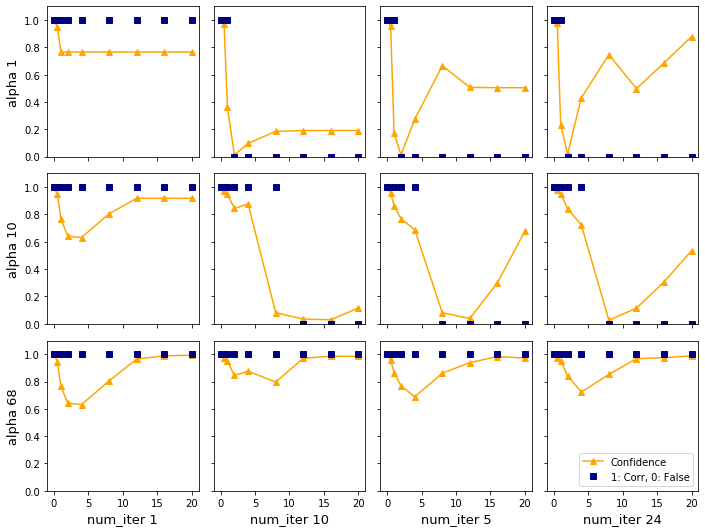

In [4]:
## Make subplot 3x4 for sample 132
sample = 132

three_alphas = [1/255, 10/255, 68/255] # Maybe use 34/255 as well
four_num_iter = [1, 10, 15, 24]

compute_hyperparameter_plot(data_loader, mean, std, model, predict, three_alphas, four_num_iter, sample, 
                                show_tensor_image, idx_to_name, save_plot=True)

**Apron example**

Epsilon 	 Iterations 	 Accuracy 	 Confidence 	 Label
0			0			1	0.89812696	apron
0.5			1			0	0.16806251	lab coat, laboratory coat
1.0			2			0	0.1357661	lab coat, laboratory coat
2.0			3			0	0.043499675	lab coat, laboratory coat
4.0			5			0	0.07082186	ballplayer, baseball player
8.0			10			0	0.11883044	ski
12.0			15			0	0.28502584	Arabian camel, dromedary, Camelus dromedarius
16.0			20			0	0.18361007	ballplayer, baseball player
20.0			24			0	0.16061513	gasmask, respirator, gas helmet


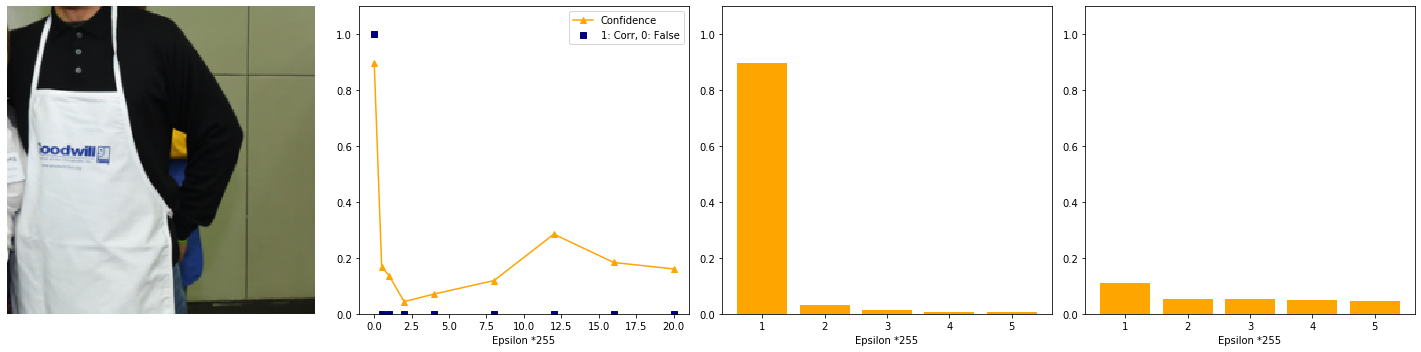

In [4]:
sample = 432

alpha = 1/255
epsilon_conf = 12/255


analyze_attack_BIM(data_loader, mean, std, model, predict, alpha, sample, epsilon_conf, show_tensor_image, idx_to_name, save_plot=True, print_output=True)

Epsilon 	 Iterations 	 Accuracy 	 Confidence 	 Label
0			0			1	0.8916601	oystercatcher, oyster catcher
0.5			1			1	0.27710265	oystercatcher, oyster catcher
1.0			2			1	0.05241054	oystercatcher, oyster catcher
2.0			3			0	0.021409415	European gallinule, Porphyrio porphyrio
4.0			5			0	0.038924474	macaw
8.0			10			0	0.060944412	macaw
12.0			15			0	0.1287087	chambered nautilus, pearly nautilus, nautilus
16.0			20			0	0.13888378	car mirror
20.0			24			0	0.2133039	tench, Tinca tinca


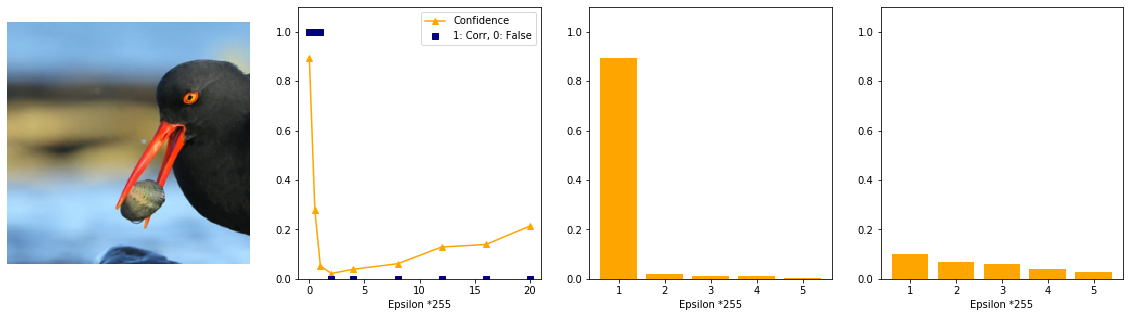

In [5]:
sample = 323
alpha = 1/255
fixed_num_iter = None
epsilon_conf = 2/255
analyze_attack_BIM(data_loader, mean, std, model, predict, alpha, sample, epsilon_conf, show_tensor_image, idx_to_name, fixed_num_iter, save_plot=False, print_output=True)

#### 3.1.2 Class bounces back. Or doesn't?

Epsilon 	 Iterations 	 Accuracy 	 Confidence 	 Label
0			0			1	0.9999355	barrel, cask
0.5			1			1	0.9818141	barrel, cask
1.0			2			1	0.39594868	barrel, cask
2.0			3			0	0.07255322	scale, weighing machine
4.0			5			0	0.14645733	tray
8.0			10			0	0.22637142	whistle
12.0			15			0	0.7400947	whistle
16.0			20			0	0.71910834	whistle
20.0			24			0	0.4863305	whistle


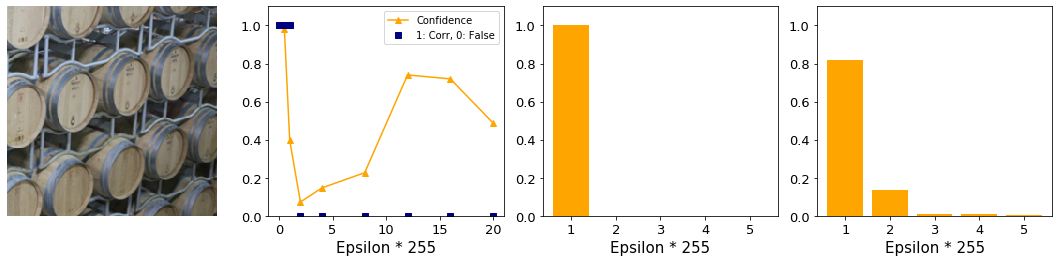

In [10]:
sample = 766
alpha = 1/255

epsilon_conf = 12/255
analyze_attack_BIM(data_loader, mean, std, model, predict, alpha, sample, epsilon_conf, 
                   show_tensor_image, idx_to_name, save_plot=True, print_output=True)

#### 3.1.3 Adversarial confidence greater than initial confidence

Epsilon 	 Iterations 	 Accuracy 	 Confidence 	 Label
0			0			1	0.49230596	umbrella
0.5			1			0	0.80780685	lionfish
1.0			2			0	0.7809352	lionfish
2.0			3			0	0.75361526	lionfish
4.0			5			0	0.7765448	lionfish
8.0			10			0	0.4354896	lionfish
12.0			15			0	0.5626644	lionfish
16.0			20			0	0.48370934	spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish
20.0			24			0	0.45280245	lionfish


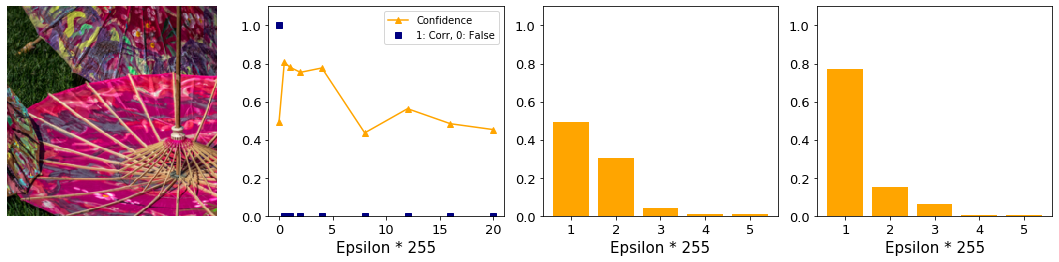

In [11]:
sample = 258
alpha = 1/255


epsilon_conf = 8/255

analyze_attack_BIM(data_loader, mean, std, model, predict, alpha, sample, epsilon_conf, 
                   show_tensor_image, idx_to_name, save_plot=True, print_output=True)

## References

[1] &emsp; Goodfellow et al. (2015) *Explaining and Harnessing Adversarial Examples*